<a href="https://colab.research.google.com/github/VasylDvorakDS/Clothes_type_prediction_with_CNN/blob/master/%D0%A1lothes_type_prediction_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [8]:
# Here is a service that simply returns  IP address in a JSON

import requests
r = requests.get('https://api.ipify.org?format=json')
j = r.json()
print(j)

# Our Tensorflow model server is the same, except what it does is much more
# complex - it returns the predictions from a ML model!

{'ip': '104.154.139.167'}


In [9]:


# More imports
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

from tensorflow import keras

from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.models import Model



In [10]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [11]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:


# number of classes
K = len(set(y_train))
print("number of classes:", K)



number of classes: 10


In [13]:


# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

In [14]:


# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)



Epoch 1/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.5299 - accuracy: 0.8044 - val_loss: 0.4013 - val_accuracy: 0.8500
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3643 - accuracy: 0.8631 - val_loss: 0.3551 - val_accuracy: 0.8702
Epoch 3/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3116 - accuracy: 0.8824 - val_loss: 0.3257 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2800 - accuracy: 0.8951 - val_loss: 0.3129 - val_accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2547 - accuracy: 0.9046 - val_loss: 0.3018 - val_accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2323 - accuracy: 0.9109 - val_loss: 0.3007 - val_accuracy: 0.8929
Epoch 7/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2166 - accuracy: 0.9180 - val_loss: 0.2991 -

In [15]:


# Save the model to a temporary directory
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model, export_path)

print('\nSaved model:')
!ls -l {export_path}



export_path = /tmp/1


Saved model:
total 172
drwxr-xr-x 2 root root   4096 Jun 23 16:18 assets
-rw-r--r-- 1 root root     57 Jun 23 16:18 fingerprint.pb
-rw-r--r-- 1 root root 162075 Jun 23 16:18 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 23 16:18 variables


In [16]:


!saved_model_cli show --dir {export_path} --all



2024-06-23 16:18:23.857210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 16:18:23.857309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 16:18:23.860933: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-23 16:18:25.568848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the followin

In [17]:


# This is the same as you would do from command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update



deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  18099      0 --:--:-- --:--:-- --:--:-- 18166
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server-universal amd64 Pac

In [18]:


!apt-get install tensorflow-model-server



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 650 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.16.1 [650 MB]
Fetched 650 MB in 9s (72.6 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.16.1_all.deb ...
Unpacking tensorflow-model-server (2.16.1) ...
Setting up tensorflow-model-server (2.16.1) ...


In [19]:


os.environ["MODEL_DIR"] = MODEL_DIR



In [20]:


!tail server.log



tail: cannot open 'server.log' for reading: No such file or directory


In [21]:


# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")



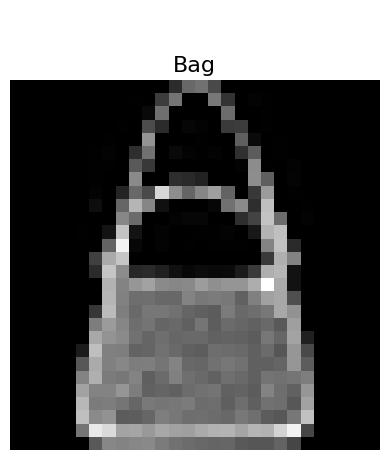

In [22]:
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

i = np.random.randint(0, len(x_test))
show(i, labels[y_test[i]])

In [27]:
# Format some data to pass to the server
# {
#   "signature_name": "serving_default",
#   "instances": [ an N x H x W x C list ],
# }

import json
data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

In [28]:


headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
j = r.json()
print(j.keys())
print(j)




In [ ]:


# It looks like a 2-D array, let's check its shape
pred = np.array(j['predictions'])
print(pred.shape)

# This is the N x K output array from the model
# pred[n,k] is the probability that we believe the nth sample belongs to the kth class



In [ ]:


# Get the predicted classes
pred = pred.argmax(axis=1)



In [ ]:


# Map them back to strings
pred = [labels[i] for i in pred]
print(pred)



In [ ]:
# Get the true labels
actual = [labels[i] for i in y_test[:3]]
print(actual)

In [ ]:
for i in range(0,3):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")

In [ ]:


# Allows you to select a model by version

headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")



In [ ]:
# Let's make a new model version
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)
model2.summary()

In [ ]:


# Compile and fit
# Note: make sure you are using the GPU for this!
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)



In [ ]:


# Save version 2 of the model

version = 2
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model2, export_path)

print('\nSaved model:')
!ls -l {export_path}



In [ ]:


# Will Tensorflow serving know about the new model without restarting?

headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/2:predict', data=data, headers=headers)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")



In [ ]:

# What if we use a version number that does not exist?
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/3:predict', data=data, headers=headers)
j = r.json()
print(j)
